# vscode test

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
import networkx as nx

In [2]:
# with open("../large-datasets/생활이동_행정동_202209/생활이동_행정동_2022.09_00시.csv", encoding="cp949") as f:
    # data = csv.reader(f)
    # data = pd.read_csv(f)
    
    
    # for row in data:
        # print(row)

from os import listdir
# from os.path import isfile, join
onlyfiles = [f for f in listdir("../large-datasets/생활이동_자치구_202209/")]
print(sorted(onlyfiles))

for filename in sorted(onlyfiles):
    with open("../large-datasets/생활이동_자치구_202209/"+filename, encoding='cp949') as f:
        print(filename)
        data = pd.read_csv(f)
        print( data.sort_values(by='평균 이동 시간(분)')[::-1].head(10) )
    
    print()

    

['생활이동_자치구_2022.09_00시.csv', '생활이동_자치구_2022.09_01시.csv', '생활이동_자치구_2022.09_02시.csv', '생활이동_자치구_2022.09_03시.csv', '생활이동_자치구_2022.09_04시.csv', '생활이동_자치구_2022.09_05시.csv', '생활이동_자치구_2022.09_06시.csv', '생활이동_자치구_2022.09_07시.csv', '생활이동_자치구_2022.09_08시.csv', '생활이동_자치구_2022.09_09시.csv', '생활이동_자치구_2022.09_10시.csv', '생활이동_자치구_2022.09_11시.csv', '생활이동_자치구_2022.09_12시.csv', '생활이동_자치구_2022.09_13시.csv', '생활이동_자치구_2022.09_14시.csv', '생활이동_자치구_2022.09_15시.csv', '생활이동_자치구_2022.09_16시.csv', '생활이동_자치구_2022.09_17시.csv', '생활이동_자치구_2022.09_18시.csv', '생활이동_자치구_2022.09_19시.csv', '생활이동_자치구_2022.09_20시.csv', '생활이동_자치구_2022.09_21시.csv', '생활이동_자치구_2022.09_22시.csv', '생활이동_자치구_2022.09_23시.csv']
생활이동_자치구_2022.09_00시.csv
          대상연월 요일  도착시간  출발 시군구 코드  도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
658606  202209  금     0      11240      35000  M  15   EH         3423   86.21
473069  202209  목     0      11120      31370  F  15   WE         1724    8.12
197135  202209  월     0      21000      11090  F  15   EH        

0         27.44
1         28.28
2          28.1
3         27.77
4         11.92
          ...  
828412        *
828413     5.96
828414      3.3
828415     3.28
828416     4.64
Name: 이동인구(합), Length: 828417, dtype: object


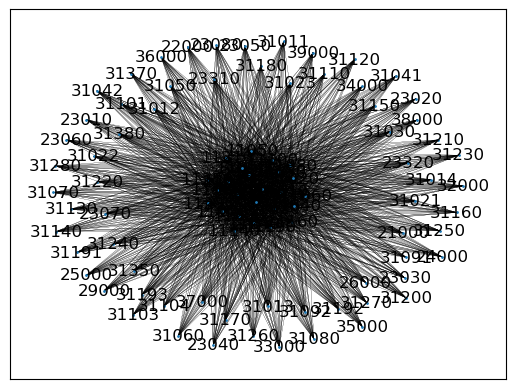

In [18]:
from os import listdir

# import pandas as pd
from pyvis.network import Network
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap as Basemap # 이건 지도용

# from os.path import isfile, join
onlyfiles = [f for f in listdir("../large-datasets/생활이동_자치구_202209/")]
# print(sorted(onlyfiles))

with open("../large-datasets/생활이동_자치구_202209/생활이동_자치구_2022.09_00시.csv", encoding='cp949') as f:
    data = pd.read_csv(f)
    # l.append(data)
    print(data['이동인구(합)'])
data = data.drop_duplicates(subset=['출발 시군구 코드', '도착 시군구 코드'],)
graph = nx.from_pandas_edgelist(data, source='출발 시군구 코드', target='도착 시군구 코드', edge_attr='이동인구(합)', create_using=nx.DiGraph())
# print( data.sort_values(by='평균 이동 시간(분)')[::-1].head(10) )/
# plt.figure(figsize = (10,9))

nx.draw_networkx(graph, node_size=1, arrows=False, width=0.1)
nt = Network(height="100%",width="100%",)
nt.from_nx(graph)
nt.toggle_physics(False)
nt.show('../results/nt.html')

#plt.savefig("../results/map_자치구.html", format="html",)
# plt.show()


In [2]:
from bokeh.io import output_notebook, show, save, export_svg
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

# import pandas as pd
import networkx as nx
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap as Basemap # 이건 지도용
#Choose a title!
title = 'Example Network'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Character", "@index")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html

#save(plot, filename=f"{title}.html")
# from os.path import isfile, join
# print(sorted(onlyfiles))

with open("../large-datasets/생활이동_자치구_202209/생활이동_자치구_2022.09_00시.csv", encoding='cp949') as f:
    data = pd.read_csv(f)
    # l.append(data)
    print(data['이동인구(합)'])

graph = nx.from_pandas_edgelist(data, source='출발 시군구 코드', target='도착 시군구 코드', edge_attr='이동인구(합)', create_using=nx.DiGraph())

network_graph = from_networkx(graph, nx.spring_layout, scale=10, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

export_svg(plot, filename="../results/plot1.svg")
# save(plot)
# html = file_html(plot, CDN, "my plot")

0         27.44
1         28.28
2          28.1
3         27.77
4         11.92
          ...  
828412        *
828413     5.96
828414      3.3
828415     3.28
828416     4.64
Name: 이동인구(합), Length: 828417, dtype: object


RuntimeError: Neither firefox and geckodriver nor a variant of chromium browser and chromedriver are available on system PATH. You can install the former with 'conda install -c conda-forge firefox geckodriver'.